<a href="https://colab.research.google.com/github/rashmika-fdo/Credit-Risk-Prediction/blob/main/Credit_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [37]:
%matplotlib inline

In [38]:
df = pd.read_csv('bankloans.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [39]:
df.shape

(1150, 9)

In [40]:
df.isna().sum()

,0
age,0
ed,0
employ,0
address,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,450


In [41]:
df.value_counts()

age  ed  employ  address  income  debtinc  creddebt  othdebt   default
56   1   11      20       59      15.0     4.672800  4.177200  0.0        1
20   1   4       0        14      9.7      0.200984  1.157016  1.0        1
     3   0       1        17      2.3      0.043792  0.347208  0.0        1
21   1   1       1        16      6.3      0.141120  0.866880  0.0        1
                          18      17.3     0.158814  2.955186  0.0        1
                                                                         ..
22   1   4       3        14      17.5     0.225400  2.224600  0.0        1
                 2        24      15.6     1.636128  2.107872  1.0        1
                 1        16      1.2      0.084480  0.107520  0.0        1
         1       3        17      18.6     0.806310  2.355690  0.0        1
                 0        18      4.4      0.270072  0.521928  0.0        1
Name: count, Length: 700, dtype: int64

In [42]:
df = df.dropna()
df.shape

(700, 9)

In [43]:
df.isna().sum()

,0
age,0
ed,0
employ,0
address,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,0


In [44]:
df.groupby('default').count()

,age,ed,employ,address,income,debtinc,creddebt,othdebt
default,,,,,,,,
0.0,517,517,517,517,517,517,517,517
1.0,183,183,183,183,183,183,183,183


<Axes: xlabel='age', ylabel='income'>

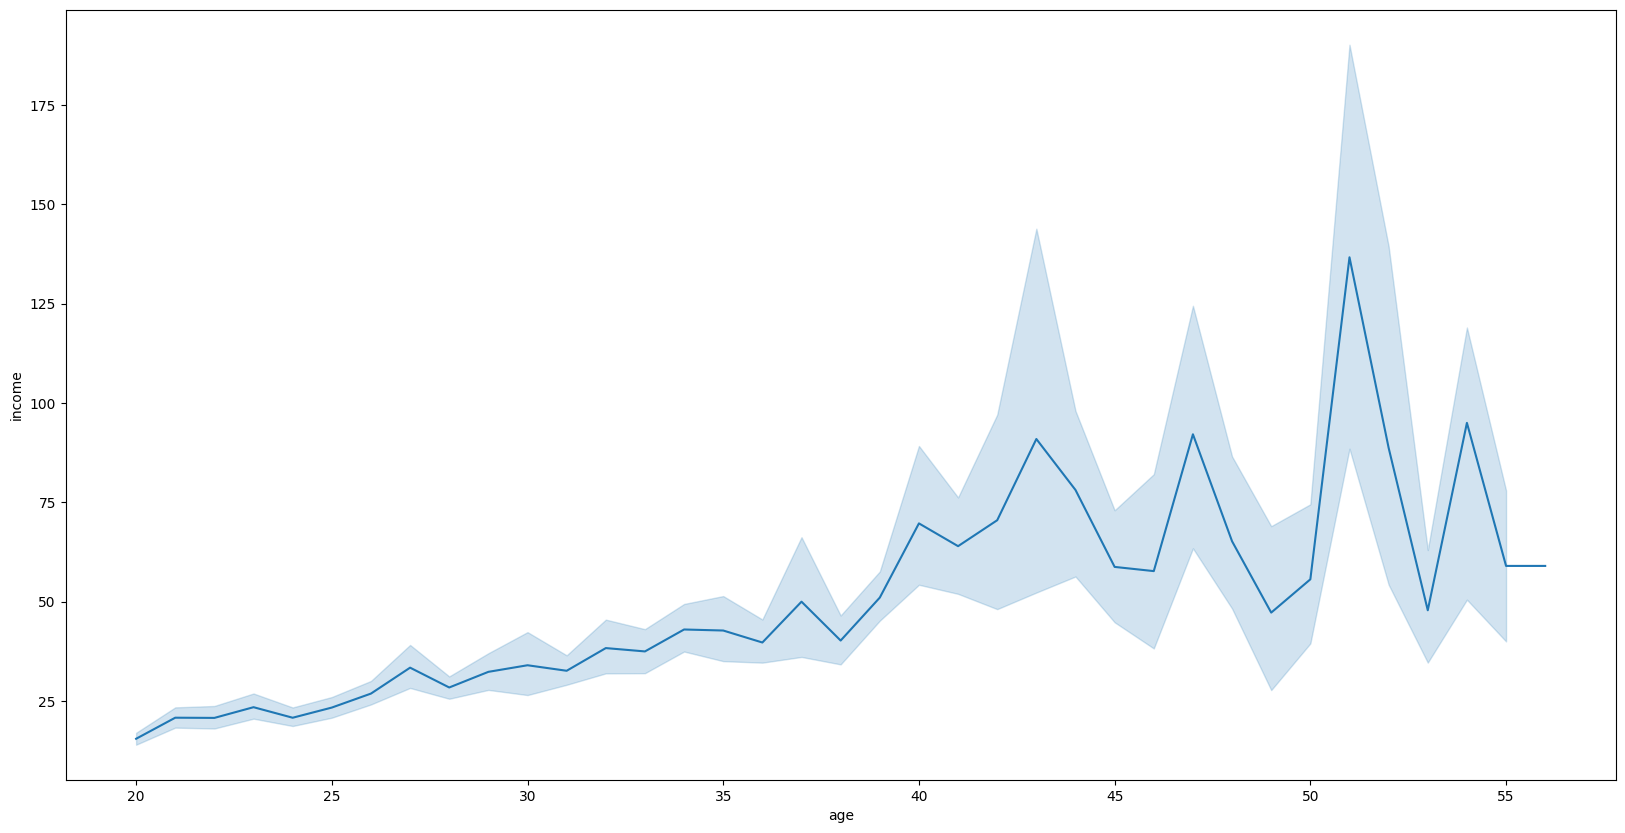

In [45]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='age', y='income', data=df, ax=ax)



<Axes: xlabel='age', ylabel='debtinc'>

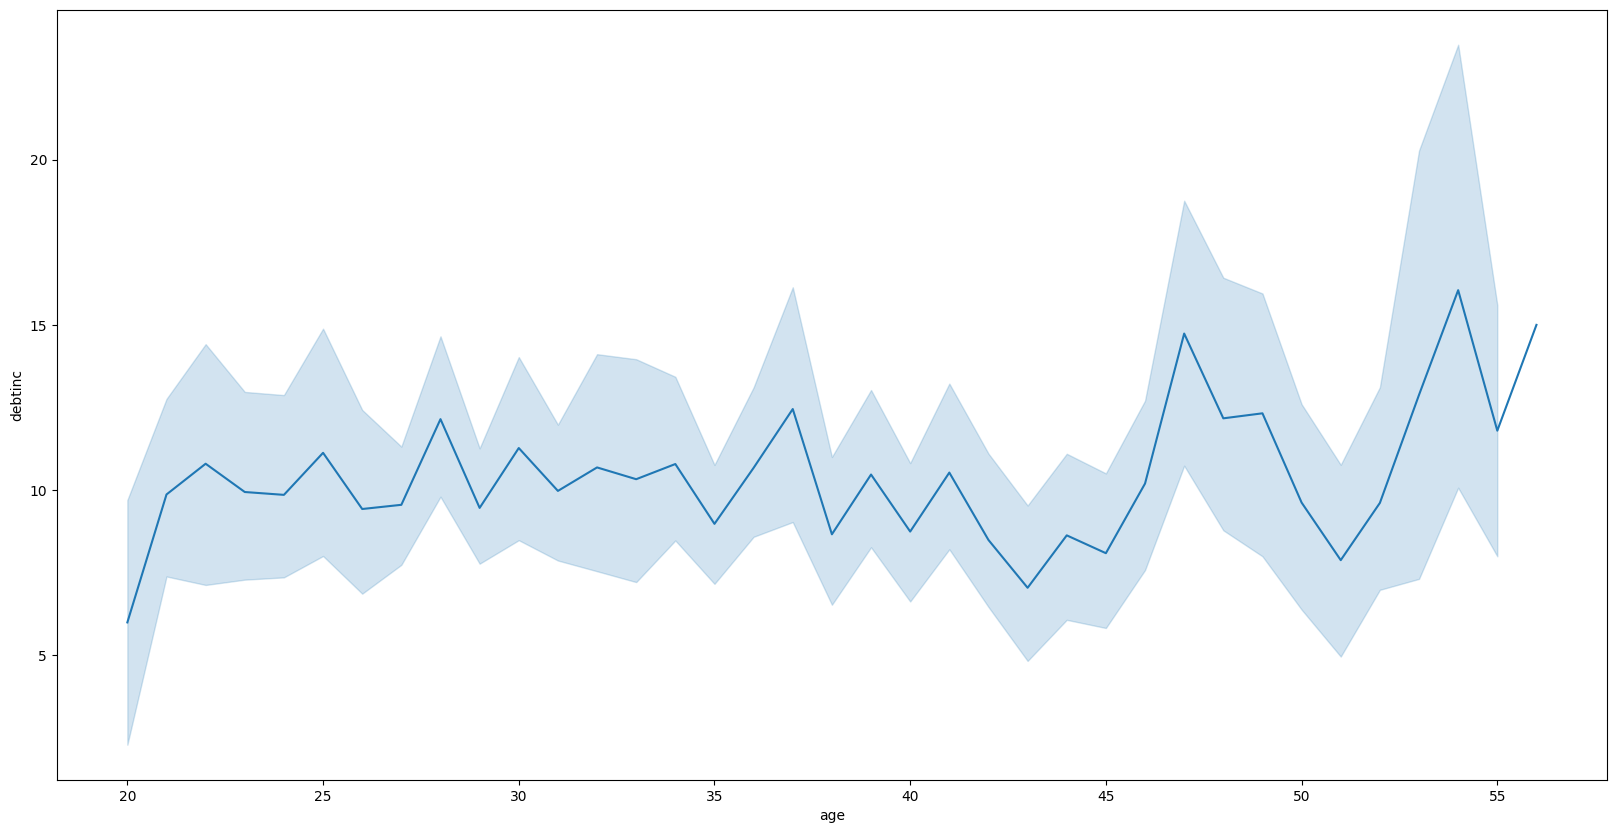

In [46]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='age', y='debtinc', data=df, ax=ax)



In [47]:
X= df.drop(['default'], axis='columns')
y=df.default

In [48]:
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Scaling

In [49]:
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Creating Model

In [50]:
rf = RandomForestClassifier(n_estimators=200)


In [51]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [52]:
rf.score(X_test, y_test)

0.7928571428571428

In [53]:
rfc2 = cross_val_score(rf,X_train, y_train, cv=10)
rfc2.mean()

np.float64(0.7839285714285713)

SVM

In [54]:
sv = SVC()
sv.fit(X_train, y_train)
sv.score(X_test, y_test)

0.7928571428571428

In [57]:
model = GridSearchCV(sv,{
    'C' : [0.1,0.2,0.4,0.8,1.2, 1.8,4,7],
    'gamma' : [0.1,0.4,0.8,1.0,2.0,3.0],
    'kernel': ['rbf', 'linear']

}, scoring='accuracy', cv=10)

In [58]:
model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4, 7],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [60]:
model.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [61]:
model2= SVC(C=0.1, gamma=0.1, kernel='linear')

In [62]:
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.8214285714285714

Logistic Regression

In [63]:
lr =LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8357142857142857

In [66]:
y_predicted = lr.predict(X_test)

cm =confusion_matrix(y_test, y_predicted)

<Axes: >

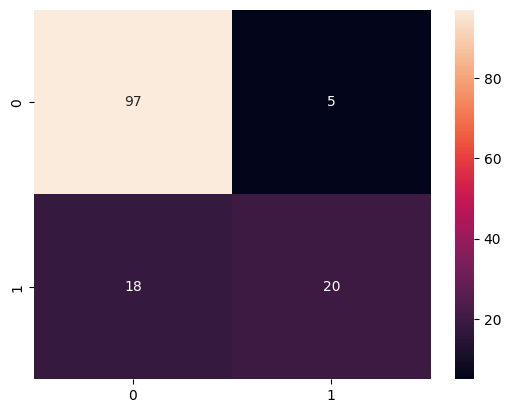

In [67]:
sn.heatmap(cm, annot=True)